<a href="https://colab.research.google.com/github/ChecinskiBartlomiej/UM/blob/main/UM_hw_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


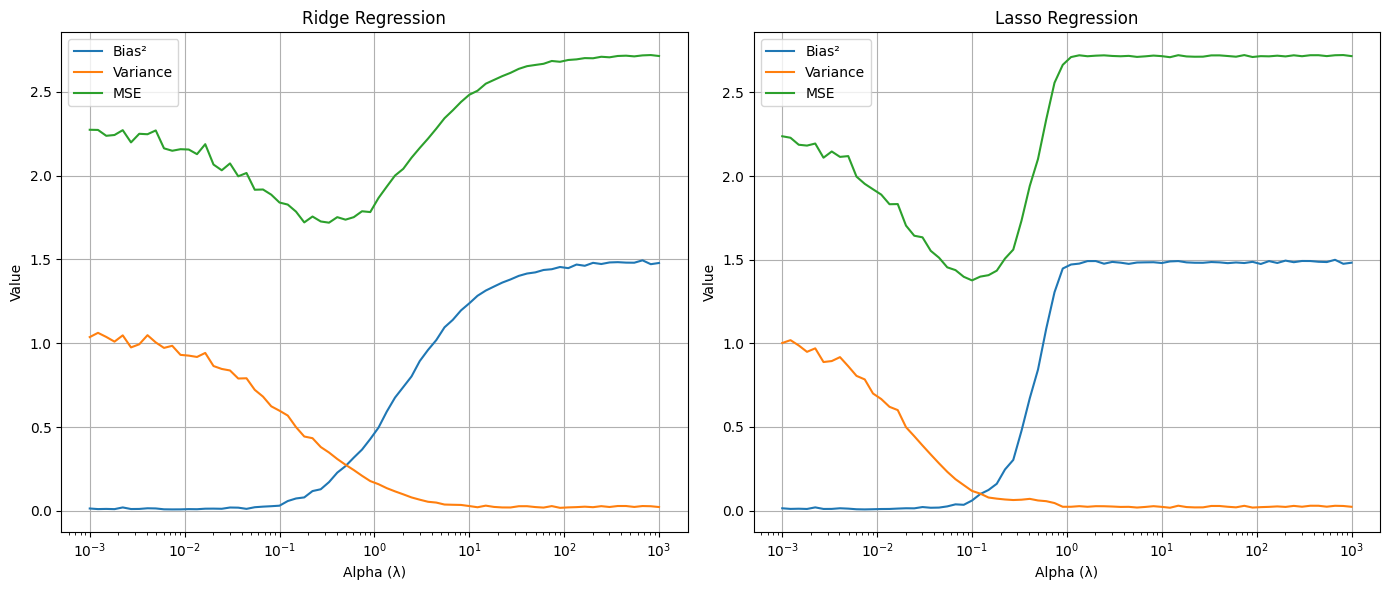

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Set parameters.
n_features = 50        # number of features
n_informative = 5      # number of features with non zero coefficient
n_train = 100          # number of examples in training set
n_test = 100           # number of examples in testing set
n_sim = 100            # number of simulations for each lambda value

np.random.seed(8)

# Define true beta vector.
beta_true = np.zeros(n_features)
nonzero_idx = np.random.choice(n_features, n_informative, replace=False)
beta_true[nonzero_idx] = np.random.randn(n_informative)

# Define function which generate training data.
def generate_data(n_samples, n_features, beta, sd=1.0):
    X = np.random.randn(n_samples, n_features)
    y = X @ beta + sd * np.random.randn(n_samples)
    return X, y

# Generate testing data.
X_test, y_test = generate_data(n_test, n_features, beta_true)

# Compute true y. We will need it later in bias calculation.
y_test_true = X_test @ beta_true

# Range of lambda parameters. Name it alpha because lambda is reserved in python.
alphas = np.logspace(-3, 3, 70)

ridge_mse, ridge_bias2, ridge_var = [], [], []
lasso_mse, lasso_bias2, lasso_var = [], [], []

# Perform simulation for each alpha. Train Ridge and Lasso n_sim times and compute bias², variance and mse.
for alpha in alphas:
    ridge_preds = np.zeros((n_sim, n_test))
    lasso_preds = np.zeros((n_sim, n_test))

    for i in range(n_sim):
        X_train, y_train = generate_data(n_train, n_features, beta_true)

        # Ridge, multiply alpha by n_train in order to have same strength of parameter in Ridge and Lasso.
        # This inconsistency is due to the scikit learn definition of Lasso.
        ridge_model = Ridge(alpha=alpha*n_train)
        ridge_model.fit(X_train, y_train)
        ridge_preds[i] = ridge_model.predict(X_test)

        # Lasso.
        lasso_model = Lasso(alpha=alpha, max_iter=10000)
        lasso_model.fit(X_train, y_train)
        lasso_preds[i] = lasso_model.predict(X_test)

    ridge_mean_pred = np.mean(ridge_preds, axis=0)
    ridge_bias2_val = np.mean((ridge_mean_pred - y_test_true)**2)
    ridge_var_val = np.mean(np.var(ridge_preds, axis=0))
    ridge_mse_val = np.mean((ridge_preds - y_test.reshape(1, -1))**2)

    ridge_bias2.append(ridge_bias2_val)
    ridge_var.append(ridge_var_val)
    ridge_mse.append(ridge_mse_val)

    lasso_mean_pred = np.mean(lasso_preds, axis=0)
    lasso_bias2_val = np.mean((lasso_mean_pred - y_test_true)**2)
    lasso_var_val = np.mean(np.var(lasso_preds, axis=0))
    lasso_mse_val = np.mean((lasso_preds - y_test.reshape(1, -1))**2)

    lasso_bias2.append(lasso_bias2_val)
    lasso_var.append(lasso_var_val)
    lasso_mse.append(lasso_mse_val)

# Plot bias², variance and mse as a function of alpha.
plt.figure(figsize=(14, 6))

# Plot Ridge.
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_bias2, label='Bias²')
plt.plot(alphas, ridge_var, label='Variance')
plt.plot(alphas, ridge_mse, label='MSE')
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Value')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)

# Plot Lasso.
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_bias2, label='Bias²')
plt.plot(alphas, lasso_var, label='Variance')
plt.plot(alphas, lasso_mse, label='MSE')
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Value')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



As we can observe, as $\lambda$ increases, the variance decreases while the bias increases in both Lasso and Ridge regression. Initially, the MSE decreases, reaches a minimum, and then begins to rise again. Although there is a point where the variance and bias$^2$ curves intersect, it would be misleading to assume that this intersection marks the minimum MSE.


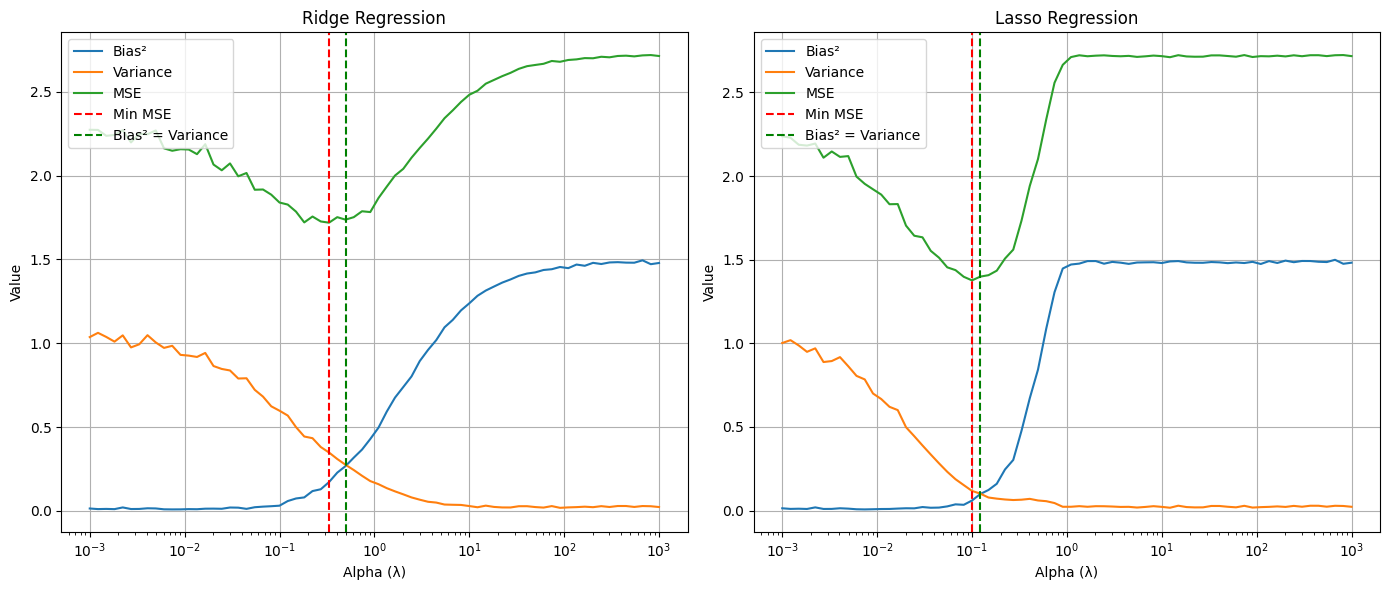

In [48]:
# Find an argument for which mse is minimal.
ridge_min_idx = np.argmin(ridge_mse)
ridge_min_alpha = alphas[ridge_min_idx]

lasso_min_idx = np.argmin(lasso_mse)
lasso_min_alpha = alphas[lasso_min_idx]

# Find an argument for which bias² curve intersect with variance curve.
ridge_intersection_idx = np.argmin(np.abs(np.array(ridge_bias2) - np.array(ridge_var)))
ridge_intersection_alpha = alphas[ridge_intersection_idx]

lasso_intersection_idx = np.argmin(np.abs(np.array(lasso_bias2) - np.array(lasso_var)))
lasso_intersection_alpha = alphas[lasso_intersection_idx]

plt.figure(figsize=(14, 6))
# Plot Ridge with vertical lines.
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_bias2, label='Bias²')
plt.plot(alphas, ridge_var, label='Variance')
plt.plot(alphas, ridge_mse, label='MSE')
plt.axvline(x=ridge_min_alpha, color='red', linestyle='--', label='Min MSE')
plt.axvline(x=ridge_intersection_alpha, color='green', linestyle='--', label='Bias² = Variance')
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Value')
plt.title('Ridge Regression')
plt.legend(loc='upper left')
plt.grid(True)

# Plot Lasso with vertical lines.
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_bias2, label='Bias²')
plt.plot(alphas, lasso_var, label='Variance')
plt.plot(alphas, lasso_mse, label='MSE')
plt.axvline(x=lasso_min_alpha, color='red', linestyle='--', label='Min MSE')
plt.axvline(x=lasso_intersection_alpha, color='green', linestyle='--', label='Bias² = Variance')
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Value')
plt.title('Lasso Regression')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

What we just saw is an instance of a more general phenomenon called the bias–variance tradeoff. For any model $\hat{f}$ that approximates the true function $f$ we have

$$
\text{MSE}(\hat{f}(x)) = \underbrace{\left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2}_{\text{Bias}^2} + \underbrace{\operatorname{Var}\left(\hat{f}(x)\right)}_{\text{Variance}} + \sigma^2.
$$

This decomposition shows that the mean squared error (MSE) of our estimator consists of three parts:

1. **Bias$^2$:**  
   This term measures the systematic error—how far the average prediction $\mathbb{E}[\hat{f}(x)]$ is from the true function $f(x)$. A high bias indicates that the model is oversimplified and may miss important patterns (underfitting).

2. **Variance:**  
   This term captures the variability of the model’s predictions around its mean when different training datasets are used. A high variance means that the model is very sensitive to fluctuations in the training data, which can lead to overfitting.

3. **Irreducible Error $sigma^2$:**  
   This term represents the noise in the data, which no model can reduce.

The bias–variance tradeoff is the balancing act between these components. Increasing model complexity generally decreases bias but increases variance, and vice versa. The goal is to find an optimal model that minimizes the overall MSE by striking the right balance between bias and variance, given that the irreducible error is fixed.

Regularization can be very helpful in obtaining the optimal trade-off where the MSE is minimized. Regularization introduces a penalty term to the loss function, and the strength of this penalty is controlled by the parameter $\lambda$. As we have seen in our example, when $\lambda$ is small, the bias is small and the variance is large. On the other hand, when $\lambda$ is large, the bias is large and the variance is small. By testing different values of $\lambda$, we can pick the optimal one, for which the MSE is minimized.

When using Ridge regression, coefficients are continuously shrunk towards zero, whereas Lasso regression tends to set some coefficients exactly to zero. As a result, Lasso can experience a more rapid increase in bias and more rapid decrease in variance.

Which method is better? It depends.

Lasso thends to be better when true underlying model is spase - only a few predictors have significant impact on the results. By driving some coefficients exactly to zero, Lasso efectively perform features selection. On the other hand, if most features are informative, Ridge regression may be preferable because it shrinks coefficients smoothly rather than zeroing them out, thus retaining all predictors and avoiding the potential loss of valuable information.

When predictors are highly correlated, Ridge regression is often advantageous. Its $L_2$ penalty distributes the shrinkage across correlated features, stabilizing the estimates without eliminating any of them. In contrast, Lasso might arbitrarily select one predictor among a group of correlated variables and set the others to zero, which can lead to instability in the model if the choice does not reflect the true underlying relationships.
